In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import random


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.metrics import precision_score,recall_score, f1_score,accuracy_score, confusion_matrix

In [4]:
df = pd.read_csv("../data/processed/cleaned_data_allnumeric.csv") 
df.head()

,Loan_ID,Dependents,Credit_History,gender,maritalstatus,education,selfemployed,area,loanstatus,log_income,log_loanamt,log_loanterm
0,LP001002,0,1.0,1,0,0,0,2,1,8.674026,4.852030,5.886104
1,LP001003,1,1.0,1,1,0,0,0,0,8.714568,4.852030,5.886104
2,LP001005,0,1.0,1,1,0,1,2,1,8.006368,4.189655,5.886104
3,LP001006,0,1.0,1,1,1,0,2,1,8.505323,4.787492,5.886104
4,LP001008,0,1.0,1,0,0,0,2,1,8.699515,4.948760,5.886104


##### Building a predictive model

In [5]:
X=df.filter(['gender','maritalstatus','Dependents','education','selfemployed','log_income','log_loanamt','log_loanterm','Credit_History','area'],axis=1)

In [6]:
y=df.filter(['loanstatus'],axis=1)

In [7]:
X.head()

,gender,maritalstatus,Dependents,education,selfemployed,log_income,log_loanamt,log_loanterm,Credit_History,area
0,1,0,0,0,0,8.674026,4.852030,5.886104,1.0,2
1,1,1,1,0,0,8.714568,4.852030,5.886104,1.0,0
2,1,1,0,0,1,8.006368,4.189655,5.886104,1.0,2
3,1,1,0,1,0,8.505323,4.787492,5.886104,1.0,2
4,1,0,0,0,0,8.699515,4.948760,5.886104,1.0,2


In [8]:
y.value_counts()

loanstatus
1             422
0             192
dtype: int64

In [9]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size = 0.3, random_state=5,stratify=y)

In [9]:
lrc = LogisticRegression()
lrc.fit(Xtrain,ytrain)

/Users/phanisingaraju/opt/anaconda3/envs/loan_prediction_env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [10]:
y_predict=lrc.predict(Xtest)

In [14]:
print("Accuracy of training data:",lrc.score(Xtrain,ytrain))
print("Test data results:")
print("Accuracy:",accuracy_score(ytest, y_predict))
print("Precision:",precision_score(ytest, y_predict))
print("Recall:",recall_score(ytest, y_predict))
print("f1:",f1_score(ytest, y_predict))

Accuracy of training data: 0.8298368298368298
Test data results:
Accuracy: 0.8324324324324325
Precision: 0.8076923076923077
Recall: 0.9921259842519685
f1: 0.8904593639575972


In [19]:
ytest.value_counts()

loanstatus
1             127
0              58
dtype: int64

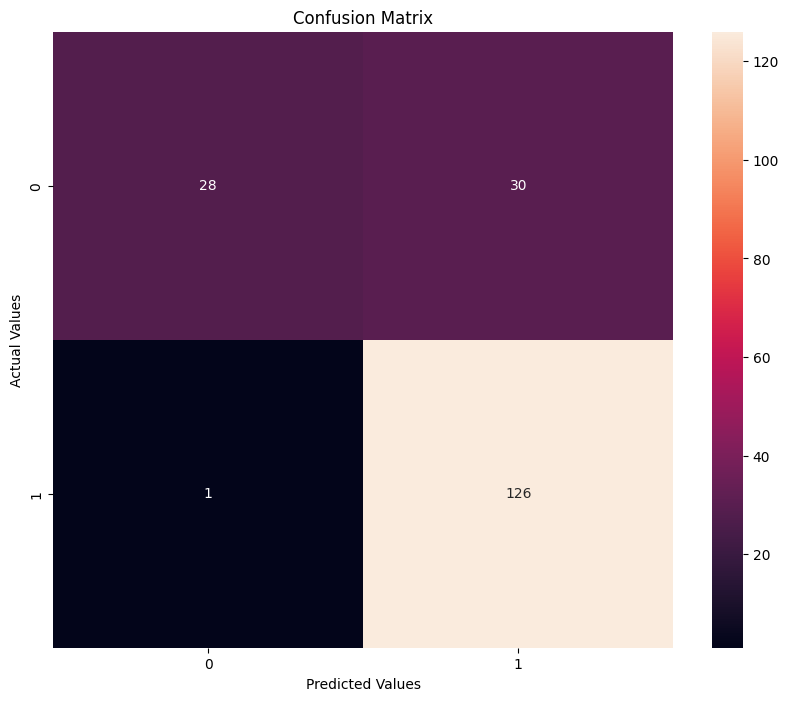

In [18]:
cm = confusion_matrix(ytest, y_predict)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True,fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [20]:
pickle.dump(lrc, open('../models/lrc.pkl', 'wb'))

In [43]:
%%time
k_range = range(1,25)
train_scores = []
test_scores = []
for k in k_range:
    neigh = KNeighborsClassifier(n_neighbors=k)
    knn=neigh.fit(Xtrain,ytrain.values.ravel())
    tr_acc_knn = knn.score(Xtrain, ytrain.values.ravel())*100
    ypred_knn = knn.predict(Xtest)
    accuracy_knn = accuracy_score(ytest,ypred_knn)
    test_acc_knn = accuracy_knn * 100
    train_scores.append(tr_acc_knn)
    test_scores.append(test_acc_knn)

CPU times: user 276 ms, sys: 4.46 ms, total: 280 ms
Wall time: 281 ms


In [44]:
K=pd.Series(k_range)


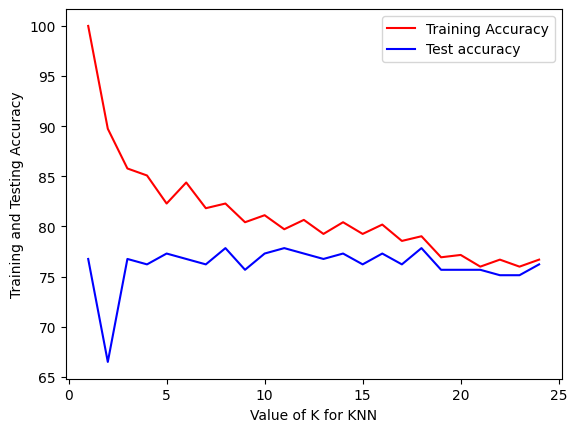

In [46]:
plt.plot(K, train_scores,color='r',label='Training Accuracy')
plt.plot(K, test_scores,color='b',label='Test accuracy')


plt.xlabel('Value of K for KNN')
plt.ylabel('Training and Testing Accuracy')
plt.legend()
plt.show()

In [47]:
neigh = KNeighborsClassifier(n_neighbors=17)
neigh.fit(Xtrain, ytrain)

/Users/phanisingaraju/opt/anaconda3/envs/loan_prediction_env/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=17)

In [48]:
y_predict_knn=neigh.predict(Xtest)

In [49]:
print("Accuracy of training data:",neigh.score(Xtrain,ytrain))
print("Test data results:")
print("Accuracy:",accuracy_score(ytest, y_predict_knn))
print("Precision:",precision_score(ytest, y_predict_knn))
print("Recall:",recall_score(ytest, y_predict_knn))
print("f1:",f1_score(ytest, y_predict_knn))

Accuracy of training data: 0.7855477855477856
Test data results:
Accuracy: 0.7621621621621621
Precision: 0.7455621301775148
Recall: 0.9921259842519685
f1: 0.8513513513513514


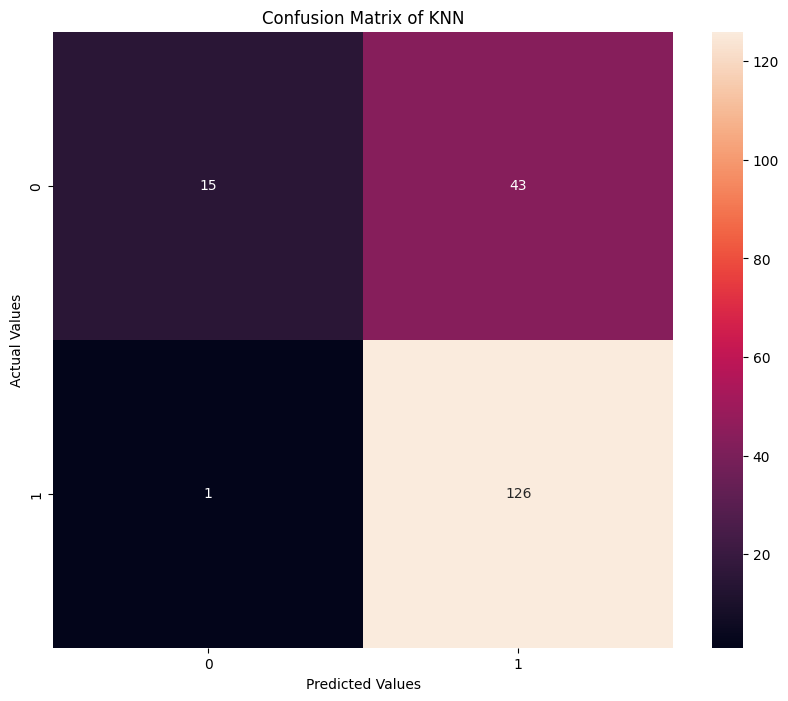

In [51]:
cm = confusion_matrix(ytest, y_predict_knn)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True,fmt='g')
plt.title('Confusion Matrix of KNN')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [58]:
pickle.dump(neigh, open('../models/knn.pkl', 'wb'))

In [53]:
rfc = RandomForestClassifier()

rfc.fit(Xtrain,ytrain.values.ravel())

RandomForestClassifier()

In [56]:
y_predict_rfc=rfc.predict(Xtest)

In [57]:
print("Accuracy of training data:",rfc.score(Xtrain,ytrain))
print("Test data results:")
print("Accuracy:",accuracy_score(ytest, y_predict_rfc))
print("Precision:",precision_score(ytest, y_predict_rfc))
print("Recall:",recall_score(ytest, y_predict_rfc))
print("f1:",f1_score(ytest, y_predict_rfc))

Accuracy of training data: 1.0
Test data results:
Accuracy: 0.7837837837837838
Precision: 0.8
Recall: 0.9133858267716536
f1: 0.8529411764705883


In [59]:
pickle.dump(rfc, open('../models/rfc_basic.pkl', 'wb'))

In [60]:
# GS parameters
parameters = {'n_estimators': [10,100,1000], 
              'max_depth': [2, 5, None],
             'min_samples_split': [2,10,30]}

# model
rf = RandomForestClassifier()

# create gird search
clf = GridSearchCV(rf, parameters, cv=5, n_jobs=-1, verbose=10,scoring='precision')

# fit grid search
clf.fit(Xtrain, ytrain.values.ravel())

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, None],
                         'min_samples_split': [2, 10, 30],
                         'n_estimators': [10, 100, 1000]},
             scoring='precision', verbose=10)

In [61]:
clf.best_params_

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 10}

In [64]:
y_predict_rfc_hp=clf.predict(Xtest)

In [65]:
print("Accuracy of training data:",clf.score(Xtrain,ytrain))
print("Test data results:")
print("Accuracy:",accuracy_score(ytest, y_predict_rfc_hp))
print("Precision:",precision_score(ytest, y_predict_rfc_hp))
print("Recall:",recall_score(ytest, y_predict_rfc_hp))
print("f1:",f1_score(ytest, y_predict_rfc_hp))

Accuracy of training data: 0.9932203389830508
Test data results:
Accuracy: 0.7675675675675676
Precision: 0.8
Recall: 0.8818897637795275
f1: 0.8389513108614232
[CV 2/5; 1/27] START max_depth=2, min_samples_split=2, n_estimators=10..........
[CV 2/5; 1/27] END max_depth=2, min_samples_split=2, n_estimators=10;, score=0.803 total time=   0.0s
[CV 2/5; 3/27] START max_depth=2, min_samples_split=2, n_estimators=1000........
[CV 2/5; 3/27] END max_depth=2, min_samples_split=2, n_estimators=1000;, score=0.803 total time=   0.7s
[CV 5/5; 6/27] START max_depth=2, min_samples_split=10, n_estimators=1000.......
[CV 5/5; 6/27] END max_depth=2, min_samples_split=10, n_estimators=1000;, score=0.829 total time=   0.7s
[CV 3/5; 12/27] START max_depth=5, min_samples_split=2, n_estimators=1000.......
[CV 3/5; 12/27] END max_depth=5, min_samples_split=2, n_estimators=1000;, score=0.817 total time=   0.8s
[CV 1/5; 16/27] START max_depth=5, min_samples_split=30, n_estimators=10........
[CV 1/5; 16/27] END 

In [10]:
Xtest

,gender,maritalstatus,Dependents,education,selfemployed,log_income,log_loanamt,log_loanterm,Credit_History,area
437,1,1,0,0,0,8.113127,4.852030,5.886104,1.0,2
597,1,0,0,0,0,8.002025,4.477337,5.886104,0.0,1
551,1,1,1,1,0,8.490233,4.852030,5.886104,1.0,0
599,1,1,2,0,0,8.662159,5.257495,5.886104,1.0,2
202,1,1,3,1,0,8.292048,4.852030,5.192957,1.0,2
...,...,...,...,...,...,...,...,...,...,...
255,0,0,3,0,0,8.033658,5.541264,5.886104,1.0,0
167,1,1,0,0,0,8.660774,4.859812,5.886104,1.0,0
133,1,1,0,0,1,8.148735,3.218876,4.787492,1.0,1
123,1,1,2,0,0,7.991931,4.394449,5.886104,1.0,1


In [11]:
#Load the model
model = pickle.load(open("../models/lrc.pkl", "rb"))

In [12]:
pred_all=model.predict(Xtest)

In [13]:
pred_all

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [28]:
test=np.array([1,1,0,0,0,8.113,4.85,5.886,1.0,2])
test.reshape(1,-1)
test

array([1.   , 1.   , 0.   , 0.   , 0.   , 8.113, 4.85 , 5.886, 1.   ,
       2.   ])

In [30]:
pred=model.predict(test.reshape(1,-1))

/Users/phanisingaraju/opt/anaconda3/envs/loan_prediction_env/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [31]:
pred

array([1])